In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

import sys

# Neural Networks


---

### Chris J. Wallace

[`@bitcollider_io`](https://twitter.com/bitcollider_io)

## I'm Chris

- I work for <span style="color:#4e85b2;">Gower Street Analytics</span>.
- Forecasting as a service for movie box office.
- Donated compute to this talk, thanks.

## What is ML?

- Basically, using math and a computer to figure things out.
- Sits somewhere in the intersection of:
  - <span style="color:#8ad849;">probability</span>
  - <span style="color:#4e85b2;">computers</span>
  - <span style="color:#e2683f;">optimization</span>
- Make decisions based on data.

## ML in broad strokes

- Supervised learning.
    - <span style="color:#4e85b2;">There's a training set.</span>

- Unsupervised learning.
    - <span style="color:#4e85b2;">There's just the data.</span>

- Reinforcement learning.
    - <span style="color:#4e85b2;">You are standing in an open field west of a white house, with a boarded front door. There is a small mailbox here.</span>
      <br>
      <span style="color:#4e85b2;">
        \> go north
      </span>

## 3 exciting things

- Probabilistic programming.
- Bayesian machine learning and generative models.
- <span style="color:#4e85b2;">Deep neural networks</span>.

## Neural networks

- Biologically _**<span style="color:#4e85b2;">inspired</span>**_.
- Network structure + learning algorithm.
- Universal function approximator.

<img src="img/big_net.png" style="margin:auto">

<img src="img/single_neuron.png" style="margin:auto">

<img src="img/single_neuron_weights.png" style="margin:auto">

In [2]:
def very_simple_network(input_1, input_2):
    weight_1 = 1
    weight_2 = 1
    bias = 0
    activation = input_1*weight_1 + input_2*weight_2 + bias
    output = 1 if activation > 0 else 0
    return output

# Exercise: try combinations of inputs and see what the output is.
# In particular, try combining boolean inputs.
# What does this network represent?

In [3]:
print("input: 0,0   output: " + str(very_simple_network(0,0)))
print("input: 1,0   output: " + str(very_simple_network(1,0)))
print("input: 0,1   output: " + str(very_simple_network(0,1)))
print("input: 1,1   output: " + str(very_simple_network(1,1)))

input: 0,0   output: 0
input: 1,0   output: 1
input: 0,1   output: 1
input: 1,1   output: 1


In [4]:
def another_simple_network(input_1, input_2):
    weight_1 = -2
    weight_2 = -2
    bias = 3
    activation = input_1*weight_1 + input_2*weight_2 + bias
    output = 1 if activation > 0 else 0
    return output

# Exercise: Try combinations of boolean inputs again.
# What kind of logic gate does this network represent?
# What is the significance of that?

In [5]:
print("input: 0,0   output: " + str(another_simple_network(0,0)))
print("input: 1,0   output: " + str(another_simple_network(1,0)))
print("input: 0,1   output: " + str(another_simple_network(0,1)))
print("input: 1,1   output: " + str(another_simple_network(1,1)))

input: 0,0   output: 1
input: 1,0   output: 1
input: 0,1   output: 1
input: 1,1   output: 0


## Logic gates

- So combinations of neural networks with the right weights and bias can represent any logic gate!
- One of the differences between a logic gate and a neural net is that nets aren't limited to boolean input and output.
- Before we continue, we'll introduce a notational trick.

    [neuralnetworksanddeeplearning.com](http://neuralnetworksanddeeplearning.com/)

<img src="img/single_neuron_step.png" style="margin:auto">

## Bye bias

- Let's call the weights `w`, the inputs `x` and the outputs `y`.
- We can actually get rid of the bias term by introducing a dummy input that is always = 1.
- Now, `activation` is just equal to `w*x`, where the operation happens _elementwise_.

In [6]:
# elementwise addition:

vector_1 = [1,2,3,4,5]
vector_2 = [1,2,3,4,5]
output_vector = [2,4,6,8,10]

def elementwise_add(v1,v2):
    # Exercise. Write a function that takes vector_1
    # and vector_2 and outputs output_vector.
    return out

In [7]:
def elementwise_add(v1,v2):
    out = [x+y for x,y in zip(v1,v2)]
    return out

# elementwise_add(vector_1,vector_2) == output_vector

## Tooling - NumPy

NumPy is the basis of most of the python scientific computing ecosystem.


In [9]:
import numpy as np

In [9]:
np.add([1,2,3,4,5],[1,2,3,4,5])

array([ 2,  4,  6,  8, 10])

In [10]:
print(np.array([1,2,3,4,5]) + np.array([1,2,3,4,5]))
print(np.array([1,2,3,4,5]) * 3)
print(np.array([1,2,3,4,5]) * np.array([1,2,3,4,5]))

[ 2  4  6  8 10]
[ 3  6  9 12 15]
[ 1  4  9 16 25]


Won't dwell here. NumPy is great.

## More tooling

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM, Dropout
from keras.optimizers import RMSprop

## Linear function

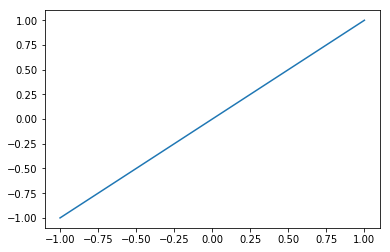

In [12]:
# construct some linear data
x = np.linspace(-1,1,201)
y = x

plt.plot(x,y)

In [13]:
single_neuron = Sequential([
    Dense(1, input_dim=1)
])
single_neuron.compile(loss='mean_squared_error', optimizer='sgd')

<img src="img/single_neuron_linear_2.png" style="margin:auto">

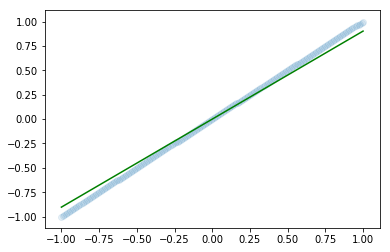

In [14]:
single_neuron.fit(x, y, nb_epoch=10, verbose=0)
y_prime = single_neuron.predict(x)

plt.scatter(x, y, alpha=0.1)
plt.plot(x, y_prime,color='g')

<img src="img/gradient_descent.png" style="margin:auto" width="750">

## Quadratic function

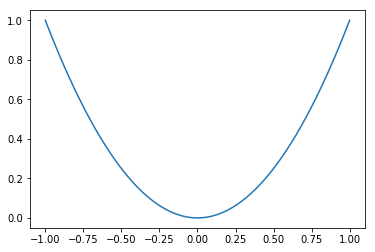

In [15]:
y2 = x**2
plt.plot(x, y2)

In [16]:
single_neuron = Sequential([
    Dense(1, input_dim=1)
])
single_neuron.compile(loss='mean_squared_error', optimizer='sgd')
single_neuron.fit(x, y2, verbose=0, nb_epoch=100)

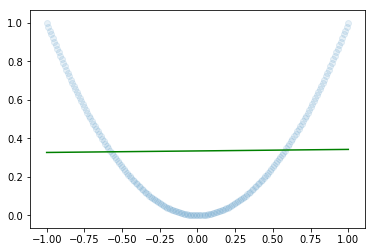

In [17]:
y2_prime = single_neuron.predict(x)
plt.scatter(x,y2, alpha=0.1)
plt.plot(x,y2_prime,color='g')

In [18]:
two_neurons = Sequential([
    Dense(2, input_dim=1),
    Activation('linear'),
    Dense(1)
])
two_neurons.compile(loss='mean_squared_error', optimizer='rmsprop')
two_neurons.fit(x, y2, nb_epoch=1000, verbose=0)

<img src="img/two_layer_net.png" style="margin:auto">

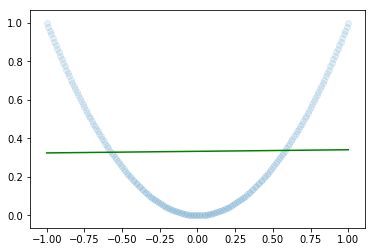

In [19]:
y2_prime = two_neurons.predict(x)
plt.scatter(x,y2, alpha=0.1)
plt.plot(x,y2_prime,color='g')

![tanh activation](img/single_neuron_tanh.png)

## Cubic function

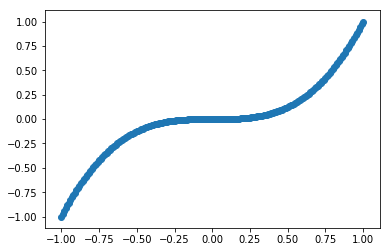

In [20]:
# generate fake dataset
x = np.linspace(-1,1,201)
y3 =  x**3
plt.scatter(x, y3)

In [24]:
cubic_network = Sequential([
    Dense(30, input_dim=1),
    Activation('tanh'),
    Dense(1)
])
cubic_network.compile(loss='mean_squared_error', optimizer='rmsprop')

In [25]:
cubic_network.fit(x, y3, nb_epoch=1000, verbose=2)

Epoch 1/1000
0s - loss: 0.0640
Epoch 2/1000
0s - loss: 0.0279
Epoch 3/1000
0s - loss: 0.0260
Epoch 4/1000
0s - loss: 0.0263
Epoch 5/1000
0s - loss: 0.0270
Epoch 6/1000
0s - loss: 0.0264
Epoch 7/1000
0s - loss: 0.0264
Epoch 8/1000
0s - loss: 0.0261
Epoch 9/1000
0s - loss: 0.0265
Epoch 10/1000
0s - loss: 0.0259
Epoch 11/1000
0s - loss: 0.0265
Epoch 12/1000
0s - loss: 0.0269
Epoch 13/1000
0s - loss: 0.0257
Epoch 14/1000
0s - loss: 0.0260
Epoch 15/1000
0s - loss: 0.0262
Epoch 16/1000
0s - loss: 0.0254
Epoch 17/1000
0s - loss: 0.0266
Epoch 18/1000
0s - loss: 0.0256
Epoch 19/1000
0s - loss: 0.0253
Epoch 20/1000
0s - loss: 0.0256
Epoch 21/1000
0s - loss: 0.0263
Epoch 22/1000
0s - loss: 0.0257
Epoch 23/1000
0s - loss: 0.0262
Epoch 24/1000
0s - loss: 0.0253
Epoch 25/1000
0s - loss: 0.0249
Epoch 26/1000
0s - loss: 0.0254
Epoch 27/1000
0s - loss: 0.0247
Epoch 28/1000
0s - loss: 0.0262
Epoch 29/1000
0s - loss: 0.0253
Epoch 30/1000
0s - loss: 0.0245
Epoch 31/1000
0s - loss: 0.0250
Epoch 32/1000
0s 

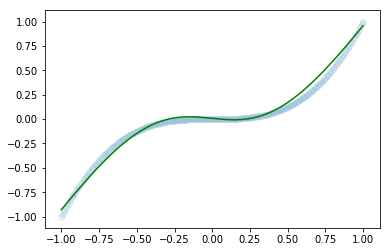

In [26]:
y3_prime = cubic_network.predict(x)
plt.scatter(x, y3, alpha=0.1)
plt.plot(x, y3_prime, color='g')

## Natural Language Generation

- Natural language processing has many applications, very broad field.
- Neural nets provide a _**<span style="color:#4e85b2;">distributed representation</span>**_ of text.
- We're going to walk through character level language generation.

### Step 1. Load data.

In [11]:
def read_lines(filename):
    lines = open(filename).read().strip().split('.')
    return lines

lines = read_lines('data/trump_speeches.txt')

all_text = ' '.join([' '.join(x.splitlines()) for x in lines])

chars = sorted(list(set(all_text)))
char_indices = {c:i for i, c in enumerate(chars)}
indices_char = {i:c for i, c in enumerate(chars)}

### Step 2. Prepare (input, output) training set.

```
input                 output
-----                 ------
"The quick brown "     "f"
"he quick brown f"     "o"
"e quick brown fo"     "x"
```

In [12]:
# need to create character sequence -> next character mappings
seqlen = 40 # 40 characters at a time.
# all possible 40 character strings from text
seqs = [all_text[i:i+seqlen]
        for i in range(len(all_text)-seqlen)]
# the next character in all those cases
char = [all_text[i+seqlen]
        for i in range(len(all_text)-seqlen)]

### How do we model language with numbers?

<img src="img/word_vectors.png" style="margin:auto">

### Step 3. Vectorization.

In [13]:
# vectorize (create one hot encoding of characters)
X = np.zeros((len(seqs), # number of training sequences
              seqlen, # length of each sequence
              len(chars)), # length of each feature vector
             dtype=np.bool)
y = np.zeros((len(seqs), len(chars)), dtype=np.bool)

for i, seq in enumerate(seqs):
    for t, c in enumerate(seq):
        X[i, t, char_indices[c]] = 1
    y[i, char_indices[char[i]]] = 1

## Recurrent neural networks

- Text is sequential data.
- So far we only looked at "feed forward" nets.
- We can change our architecture to look at sequences of inputs.

<img src="img/empty_neuron.png" style="margin:auto">

<img src="img/recurrent_neuron.png" style="margin:auto">

<img src="img/backprop_through_time.png" style="margin:auto">

In [ ]:
# LSTM is a special kind of recurrent neuron
model = Sequential([
    LSTM(256, return_sequences=True, input_shape=(seqlen, len(chars))),
    Dropout(0.2),
    LSTM(256),
    Dropout(0.2),
    Dense(len(chars)),
    Activation('softmax'),
])
model.compile(loss='categorical_crossentropy', optimizer='adam')

![character lstm](img/char_lstm.png)

In [ ]:
from keras.models import load_model
model = load_model('models/trump_epoch_60.h5')

In [ ]:
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    # thieved from Keras creator @fchollet
    preds = np.asarray([max(x,10**-10) for x in preds]).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [ ]:
# Here's the fun part.
# Exercise. Person with the funniest output wins.

# Initialisation
generated = ''

# The seed of the text generation. Feel free to change this,
# but make sure it's at least 40 characters:
sentence = "We're going to Make America Great Again "

# Number of characters to generate following the seed.
# Try a whole essay!
length = 1000

# The "temperature" determines how diverse the generated text is.
# It just reweights the output probabilities from the network.
# A lower temperature will be more conservative,
# whereas a higher temperature will be more diverse,
# but probably stop making sense.
temperature = 0.3

# Below here is boilerplate to output the generated text.
sentence = sentence[-40:] # take only the last 40 characters to begin generation.
generated += sentence

print()
sys.stdout.write(generated)
print()
prev_char = ''
for i in range(length):
    x = np.zeros((1, seqlen, len(chars)))
    for t, char in enumerate(sentence):
        x[0, t, char_indices[char]] = 1.

    preds = model.predict(x, verbose=0)[0]
    next_index = sample(preds, temperature)
    next_char = indices_char[next_index]
    
    generated += next_char
    sentence = sentence[1:] + next_char
    
    if prev_char == ' ' and next_char == ' ':
        sys.stdout.write('\n')
    else:
        sys.stdout.write(next_char)
    prev_char = next_char
    sys.stdout.flush()

# Thanks!

- [@sharperecruit](https://twitter.com/sharperecruit)
- [@mypebble](https://twitter.com/mypebble)
- [@campusnorthuk](https://twitter.com/campusnorthuk)

Dumb personal brand.
- [@bitcollider_io](https://twitter.com/bitcollider_io)